In [146]:
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import shape

import torch
from torch import cos, sub, t, unsqueeze
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from PIL import Image


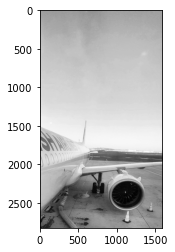

Image size is torch.Size([1, 3, 2825, 1589])


In [147]:
# global variables and settings
torch.no_grad()
img_path = 'imgs/airplane.jpg'

# preprocessor
prep = transforms.Compose([transforms.ToTensor()])

# read image
img = prep(Image.open(img_path)).unsqueeze(0)

# display image
plt.imshow(1 - img.squeeze()[0], cmap='Greys')
plt.show()

# print image size
print(f"Image size is {img.shape}")

tensor([[[[-0.1608, -4.6607, -5.2829,  ..., -5.3223, -5.2829, -4.6607],
          [-1.8995, -3.9408, -4.7735,  ..., -5.4955, -4.6591, -5.7402],
          [-2.7339, -3.6635, -3.8532,  ..., -5.5126, -5.6052, -4.4624],
          ...,
          [-5.1102, -4.8189, -5.3684,  ..., -5.2377, -3.7016, -3.8702],
          [-2.7339, -4.4624, -5.6052,  ..., -5.8063, -3.8532, -3.6635],
          [-1.8995, -5.7402, -4.6591,  ..., -5.5040, -4.7735, -3.9408]],

         [[-0.1121, -4.3592, -5.3084,  ..., -5.8859, -5.3084, -4.3592],
          [-1.8208, -3.8243, -4.3083,  ..., -5.9363, -4.8665, -5.3630],
          [-2.7496, -3.7812, -3.8377,  ..., -5.6945, -5.3790, -4.9640],
          ...,
          [-3.7275, -5.4138, -5.7981,  ..., -5.3007, -3.8342, -4.1204],
          [-2.7496, -4.9640, -5.3790,  ..., -5.4483, -3.8377, -3.7812],
          [-1.8208, -5.3630, -4.8665,  ..., -5.5747, -4.3083, -3.8243]],

         [[ 0.0000, -4.0602, -4.6714,  ..., -5.8654, -4.6714, -4.0602],
          [-1.6787, -3.6100, -

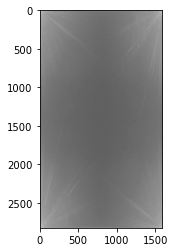

In [148]:
# pass image through
raw_frequency= torch.rfft(img, onesided=False, signal_ndim=2)
frequency_magnitude = torch.sqrt(raw_frequency[:, :, :, :, 0]**2 + raw_frequency[:, :, :, :, 1]**2)
frequency_magnitude /= torch.max(frequency_magnitude)
frequency_magnitude = torch.log(frequency_magnitude)
print(frequency_magnitude)

# display frequency image
plt.imshow(1 - frequency_magnitude.squeeze()[0], cmap='Greys')

# print image size
print(f"Raw frequency size is {raw_frequency.shape}")
print(f"Magnitude frequency size is {frequency_magnitude.shape}")

torch.Size([2825, 1589])
torch.Size([1, 1, 2825, 1589, 2])


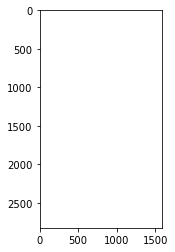

In [154]:
# create blur map
blur_map = torch.zeros(img.squeeze()[0].shape)
print(blur_map.shape)

blur_map_width = blur_map.shape[0] / 2
blur_map_height = blur_map.shape[1] / 2

line_of_pixels = torch.zeros(blur_map.shape[1])

for i, _ in enumerate(line_of_pixels):
    line_of_pixels[i] = (abs(blur_map_height - i + 1) / blur_map_height)

for i, _ in enumerate(blur_map):
    blur_map[i][:] = line_of_pixels * (abs(blur_map_width - i + 1) / blur_map_width)

blur_map = blur_map/torch.max(blur_map)
blur_map = blur_map**4
blur_map = torch.ones(blur_map.shape)

plt.imshow(1 - blur_map, cmap='Greys')
blur_map = blur_map.unsqueeze(0).unsqueeze(0).unsqueeze(-1)
blur_map = torch.cat([blur_map, blur_map], dim=-1)

print(blur_map.shape)
plt.show()

torch.Size([1, 3, 2825, 1589, 2])


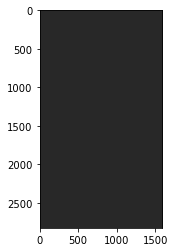

torch.Size([1, 3, 2825, 1589])


In [155]:
# multiply blur map by raw frequency to convolve time domain in frequency domain
filtered_raw_frequency = raw_frequency * blur_map

print(filtered_raw_frequency.shape)
filtered_img = torch.irfft(filtered_raw_frequency, onesided=False, signal_ndim=2)

to_show = filtered_raw_frequency[0, 0,0 :, :, 0].squeeze() / torch.max(filtered_raw_frequency)
plt.imshow(1 - to_show, cmap='Greys')
plt.show()

print(filtered_img.shape)
filtered_img /= torch.max(filtered_img)

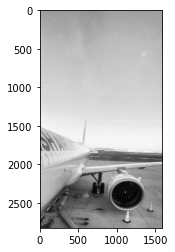

In [156]:
# display filtered image
plt.imshow(1 - filtered_img.squeeze()[0], cmap='Greys')
plt.show()